# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_RGB, y_train = train['features'], train['labels']
X_test_RGB, y_test = test['features'], test['labels']
print("Training Set Extracted from pickle file")
print("Test Set Extracted from pickle file")
print(X_train_RGB.shape)
print(y_train.shape)

Training Set Extracted from pickle file
Test Set Extracted from pickle file
(39209, 32, 32, 3)
(39209,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train_RGB)

# TODO: Number of testing examples.
n_test = len(X_test_RGB)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_RGB[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_test)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

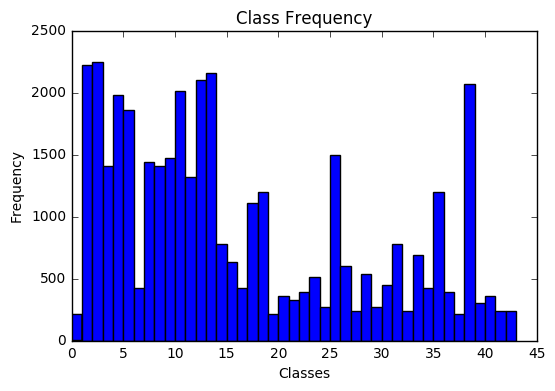

In [4]:
# Plot the frequency of all classes
import numpy as np
from collections import Counter
plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max()+2))
plt.title('Class Frequency')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

# keep count of the number of features of each class to increase later
counts = Counter(y_train)

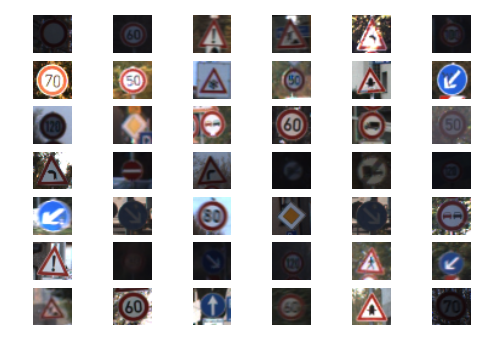

In [5]:
# Generate a random gallery of the traffic signs
import random

for i in range(42):
    plt.subplot(7,6,i+1)
    index = random.randint(0, len(X_train_RGB))
    image = X_train_RGB[index]
    plt.axis("off")
    plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Transformed Test and Training Sets to Grayscale
Random sign from training set with index:  21


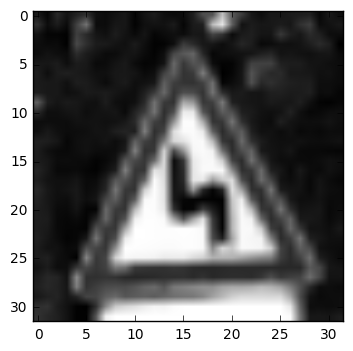

In [6]:
### First preprocessing step: Transform images from RGB to grayscale
import cv2

# Initialize empty train and test feature arrays
X_train = []
X_test = []

# Transform every image in Training set to Grayscale
for i in range(len(X_train_RGB)):
    grayscale_2d = cv2.cvtColor(X_train_RGB[i], cv2.COLOR_BGR2GRAY)
    X_train.append(grayscale_2d)

# Transform every image in Test Set to Grayscale
for i in range(len(X_test_RGB)):
    grayscale_2d = cv2.cvtColor(X_test_RGB[i], cv2.COLOR_BGR2GRAY)
    X_test.append(grayscale_2d)
    
print("Transformed Test and Training Sets to Grayscale")    
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.imshow(image,cmap='gray')
print("Random sign from training set with index: ",y_train[index])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I preprocessed the data by changing the all images in training and test set to grayscale. It makes sense to consider only the shapes of the signs for training and not the color. The intution behind this is that all signs have a limited range of color, so we should have our model focus on the shapes of the signs, rather than the color of the signs.

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Define different types of transformations to be applied on the training set to have approximately 
# equal training features for each traffic sign class

def RotateImageCW15(image):
    rows,cols = image.shape
    angle = 15
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def RotateImageCW30(image):
    rows,cols = image.shape
    angle = 30
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def RotateImageCW45(image):
    rows,cols = image.shape
    angle = 45
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def RotateImageACW15(image):
    rows,cols = image.shape
    angle = -15
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def RotateImageACW30(image):
    rows,cols = image.shape
    angle = -30
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def RotateImageACW45(image):
    rows,cols = image.shape
    angle = -45
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def PerspectiveTransformLeft(image):
    rows, cols = image.shape
    pts1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    pts2 = np.float32([[5,5],[32,0],[5,27],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(cols,rows))
    return dst

def PerspectiveTransformRight(image):
    rows, cols = image.shape
    pts1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    pts2 = np.float32([[0,0],[27,5],[0,32],[27,27]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(cols,rows))
    return dst

def PerspectiveTransformBottom(image):
    rows, cols = image.shape
    pts1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    pts2 = np.float32([[5,0],[27,0],[0,32],[32,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(cols,rows))
    return dst

def PerspectiveTransformTop(image):
    rows, cols = image.shape
    pts1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    pts2 = np.float32([[0,0],[32,0],[5,32],[27,32]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(cols,rows))
    return dst

def AffineTransformCW(image):
    rows, cols = image.shape
    pts1 = np.float32([[10,10],[22,10],[10,22]])
    pts2 = np.float32([[10,0],[22,15],[5,10]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

# Anti-Clockwise Affine Transform
def AffineTransformACW(image):
    rows, cols = image.shape
    pts1 = np.float32([[10,0],[22,15],[5,10]])
    pts2 = np.float32([[10,10],[22,10],[10,22]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def TranslationRight(image):
    rows,cols = image.shape
    M = np.float32([[1,0,5],[0,1,5]])
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst
    
def TranslationLeft(image):
    rows,cols = image.shape
    M = np.float32([[1,0,-5],[0,1,-5]])
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

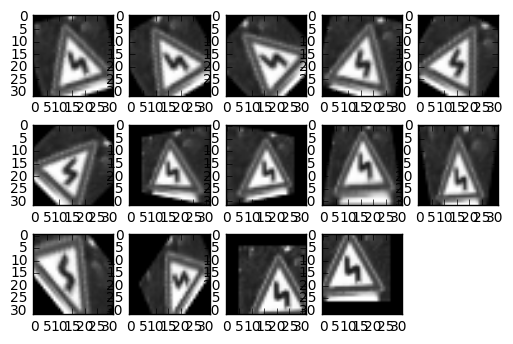

In [8]:
TransformationsList = [RotateImageCW15, RotateImageCW30, RotateImageCW45, 
                       RotateImageACW15, RotateImageACW30, RotateImageACW45,
                       PerspectiveTransformLeft, PerspectiveTransformRight, PerspectiveTransformBottom, PerspectiveTransformTop,
                       AffineTransformCW, AffineTransformACW,
                       TranslationRight, TranslationLeft]

# Try the transformations on a random image
for i,trans in enumerate(TransformationsList):
    plt.subplot(3,5,i+1)
    plt.imshow(trans(image),cmap='gray')

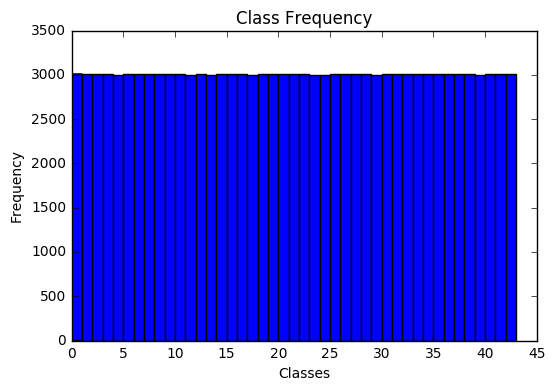

In [9]:
# Here, the transformations are applied on each class in a way to make all classes have approximately the same number
# of features

import math

# Define the min number of features for each class
min_num_features = 3000

# start with class zero
start = 0

# iterate over all classes
for class_num in range(0,43):    
    
    # initialize the added features array and their corresponding features
    X_added = []
    y_added = []
    
    # calculate the number of features needed for class num to >= min_num_features
    n_features_class_i = counts[class_num]
    additional_features_needed = min_num_features - n_features_class_i
    n_features_to_be_Transformed = math.ceil(additional_features_needed / len(TransformationsList))
    
    # apply transformations to images
    for img in range(start,start+n_features_to_be_Transformed):
        for i,trans in enumerate(TransformationsList):
            X_added.append(trans(X_train[img]))
            y_added.append(class_num)
            
    # append new features and labels to the training set
    X_train = np.append(X_train, X_added, axis=0)
    y_train = np.append(y_train, y_added, axis=0)
    
    # move start index to next class
    start = start + n_features_class_i

# plot a frequency graph to make sure that all classes have approximately equal number of features    
plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max()+2))
plt.title('Class Frequency')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets with a ratio of 80:20
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)
    
print("Updated Image Shape: {}".format(X_validation[0].shape))

Updated Image Shape: (32, 32)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
After visualizing the number of features in each class, it appeared that the some classes had really relatively high 
number of features compared to other classes. This would make the model biased in favor of some classes on the expense of classes with relatively low number of features. Consequently, I applied image transformations in order to have all classes have almost the same number of features, so that the model would trained to all classes equally. The frequency plot above shows that after adding the generated data, all classes now have approximately equal number of features.
The training set is then split into training set and a validation set using the sklearn train_test_split utility.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x20. Output = 14x14x20
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x36.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 36), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(36))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x36. Output = 900.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 900. Output = 500.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(900, 500), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(500))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 500. Output = 300.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(500, 300), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(300))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 5: Fully Connected. Input = 300. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(300, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I started with the LeNet architecture, and then tweaked depths of some layers, as well as the number of units in the fully connected layer to enhance the model's performance.

Here are the details of each layer:

Layer 1: Convolutional: Input size: 32x32x1, The output shape should be 28x28x20.
         Activation: ReLU
         Pooling: The output shape should be 14x14x20.

Layer 2: Convolutional: Input size: 14x14x20, The output shape should be 10x10x36.
         Activation: ReLU
         Pooling: The output shape should be 5x5x36.

Flatten: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

Layer 3: Fully Connected: This should have 500 outputs.
         Activation: ReLU
         
Layer 4: Fully Connected: This should have 300 outputs.
         Activation: ReLU
         
Layer 5: Fully Connected (Logits). This should have 43 outputs.

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


rate = 0.001

logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data,keep_prob_val):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# reshape training and validation
X_train = np.reshape(X_train, (np.shape(X_train)[0],32,32,1))
X_validation = np.reshape(X_validation, (np.shape(X_validation)[0],32,32,1))

# normalize training and validation
X_train = (np.array(X_train) - 128.0)/256.0
X_validation = (np.array(X_validation) - 128.0)/256.0

### Training the Model

In [14]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.3})
            
        validation_accuracy = evaluate(X_validation, y_validation, 1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.847

EPOCH 2 ...
Validation Accuracy = 0.942

EPOCH 3 ...
Validation Accuracy = 0.965

EPOCH 4 ...
Validation Accuracy = 0.973

EPOCH 5 ...
Validation Accuracy = 0.973

EPOCH 6 ...
Validation Accuracy = 0.980

EPOCH 7 ...
Validation Accuracy = 0.986

EPOCH 8 ...
Validation Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.989

EPOCH 11 ...
Validation Accuracy = 0.989

EPOCH 12 ...
Validation Accuracy = 0.991

EPOCH 13 ...
Validation Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.991

EPOCH 15 ...
Validation Accuracy = 0.992

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.993

EPOCH 18 ...
Validation Accuracy = 0.993

EPOCH 19 ...
Validation Accuracy = 0.994

EPOCH 20 ...
Validation Accuracy = 0.993

Model saved


### Testing the Model

In [15]:
# reshape the test set
X_test = np.reshape(X_test, (np.shape(X_test)[0],32,32,1))
# normalize the test set
X_test = (np.array(X_test) - 128.0)/256.0
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.943


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The model used for training has the following paramters:

Type of optimizer: Adam optimizer

Learning rate: 0.001

Batch size: 128

Epochs: 20

Hyperparameters: 
    Dropout keep probability for training = 0.3
    Weight initialization:  mean = 0, standard deviation= 0.1 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started off by using the LeNet network architecutre. The training performance was relatively good (about 96%), but the test performance was below 90%. As an attempt to enhance the model's performance, I increased and tuned the depth of each layer in the LeNet architecture. This lead to a relative increase in the performance. In addition, to prevent the model from overfitting, I applied the dropout regularization technique to make the model generalize well. This proved to increase the model's performance to about 95%.

As for the number of epochs, I stared with 10, but increased it incremently until I felt that 20 epochs would be enough to produce high test accuracy, which meant that I was not overfitting the model by much. I tried increasing the number of epochs, but the model started overfitting.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Image:  LeNet-pics/do_not_enter_signs.jpg
Prediction:  17  ( No entry  )

Image:  LeNet-pics/stop-street-sign.jpg
Prediction:  38  ( Keep right  )

Image:  LeNet-pics/50kph.jpg
Prediction:  0  ( Speed limit (20km/h)  )

Image:  LeNet-pics/deer_crossing.jpg
Prediction:  41  ( End of no passing  )

Image:  LeNet-pics/no_right_turn_signs.jpg
Prediction:  26  ( Traffic signals  )

Image:  LeNet-pics/children_crossing.jpg
Prediction:  18  ( General caution  )

Image:  LeNet-pics/30kph.jpg
Prediction:  9  ( No passing  )

Image:  LeNet-pics/no_u_turn.jpg
Prediction:  37  ( Go straight or left  )

Image:  LeNet-pics/bicycle_yield.jpg
Prediction:  29  ( Bicycles crossing  )

Image:  LeNet-pics/Speed_bump.jpg
Prediction:  22  ( Bumpy road  )



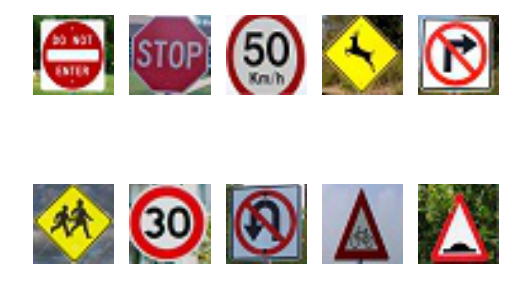

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import glob

new_X_Test_RGB = []
i = 0
for file in glob.glob('LeNet-pics/*.jpg'):
    #print(file)
    plt.subplot(2,5,i+1)
    img=mpimg.imread(file)
    plt.axis("off")
    plt.imshow(img)
    new_X_Test_RGB.append(img)
    i += 1
    
    
new_X_Test = []
    
# Transform every image in new Test Set to Grayscale
for i in range(len(new_X_Test_RGB)):
    grayscale_2d = cv2.cvtColor(new_X_Test_RGB[i], cv2.COLOR_BGR2GRAY)
    new_X_Test.append(grayscale_2d)
    
# reshape test set
new_X_Test = np.reshape(new_X_Test, (np.shape(new_X_Test)[0],32,32,1))

# normalize test set
new_X_Test = (np.array(new_X_Test) - 128.0)/256.0

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = tf.argmax(logits, 1)
    pred_run = sess.run(predictions,feed_dict={x: new_X_Test, keep_prob: 1.0})

# read csv file and save sign names
import pandas as pd
df = pd.read_csv('signnames.csv')
saved_column = df.SignName

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
After looking at the predictions of the models when tested used new images, there a few qualities that classification difficult. For example, signs never seen before are impossible to classify correctly, like the deer crossing sign. In addition, signs that look similar to each other make cause cross-prediction, like the 50 km/h and 30 km/h signs. 

In [19]:
### Run the predictions here.
i = 0      
for file in glob.glob('LeNet-pics/*.jpg'):
    print("Image: ",file)
    print("Prediction: ",pred_run[i]," (", saved_column[pred_run[i]]," )")
    i += 1
    print()

Image:  LeNet-pics/do_not_enter_signs.jpg
Prediction:  17  ( No entry  )

Image:  LeNet-pics/stop-street-sign.jpg
Prediction:  38  ( Keep right  )

Image:  LeNet-pics/50kph.jpg
Prediction:  0  ( Speed limit (20km/h)  )

Image:  LeNet-pics/deer_crossing.jpg
Prediction:  41  ( End of no passing  )

Image:  LeNet-pics/no_right_turn_signs.jpg
Prediction:  26  ( Traffic signals  )

Image:  LeNet-pics/children_crossing.jpg
Prediction:  18  ( General caution  )

Image:  LeNet-pics/30kph.jpg
Prediction:  9  ( No passing  )

Image:  LeNet-pics/no_u_turn.jpg
Prediction:  37  ( Go straight or left  )

Image:  LeNet-pics/bicycle_yield.jpg
Prediction:  29  ( Bicycles crossing  )

Image:  LeNet-pics/Speed_bump.jpg
Prediction:  22  ( Bumpy road  )



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The performance of the model degared noticably when tested on new images found on the web. The accuracy for the new images was 30% (3 out of 10) compared to 95% for the original test set.

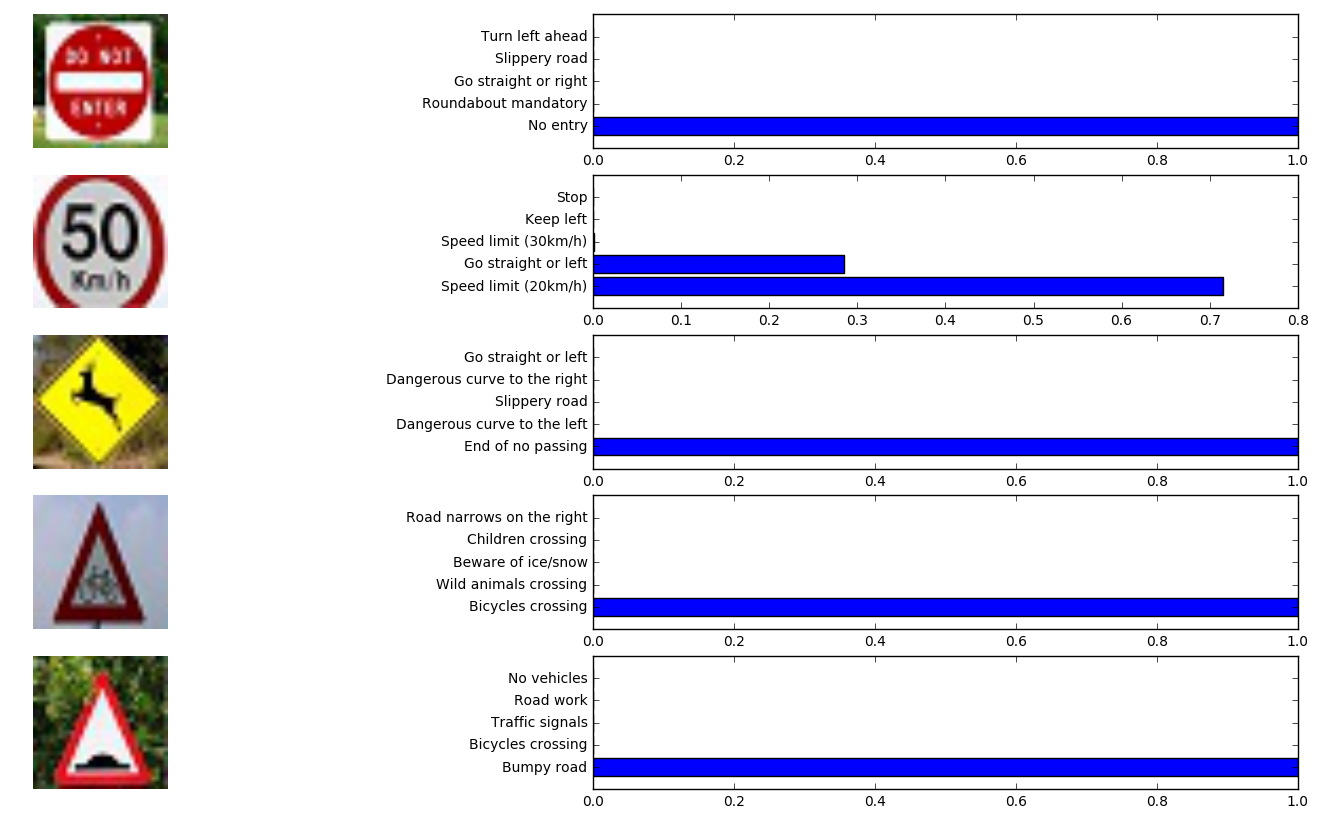

In [92]:
### Visualize the softmax probabilities here.
# get the softmax probabilities for n best prediction probabilities.
n = 5
y_pos = np.arange(n)
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = tf.nn.softmax(logits)
    pred_run = sess.run(tf.nn.top_k(predictions,k=n),feed_dict={x: new_X_Test , keep_prob: 1.0})

plt.subplots(figsize=(20, 10))
probs, classes = pred_run
chosen_image = [0,2,3,8,9]
i = 0
for img in chosen_image:
    plt.subplot(5,2,i+1)
    plt.imshow(new_X_Test_RGB[img])
    plt.axis('off')

    plt.subplot(5,2,i+2)
    plt.barh(y_pos, probs[img], align='center')
    plt.yticks(y_pos,saved_column[classes[img]])
    
    i += 2


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**

For the "No Entry" Sign: 
The model was 100% certain about the prediction, and the prediction was correct

For the "50 km/h" Sign: 
The model was not very certain, and the correct predicion was not in the top 5 predictions

For the "Deer Crossing" Sign:
The model was 100% certain about the prediction, eventhough it was incorrect

For the "Bicycle Crossing" Sign: 
The model was 100% certain about the prediction, and the prediction was correct

For the "Bumpy Road" Sign: 
The model was 100% certain about the prediction, and the prediction was correct


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.